1. Identify a dataset to study, and perform an exploratory analysis of the data. Describe the
dataset, including its basic statistics and properties, and report any interesting findings. This
exploratory analysis should motivate the design of your model in the following sections. Datasets
should be reasonably large (e.g. large enough to run the kinds of methods we’ve discussed in
class).


https://www.kaggle.com/datasets/netflix-inc/netflix-prize-data

In [40]:
import numpy as np
import pandas as pd
from collections import defaultdict
import datetime
from dateutil.parser import parse
from tqdm import tqdm
import sys
import matplotlib.pyplot as plt

In [52]:
# Movies: 1 to 17770 
# Ratings: 1 to 5
# Users: 1 to 2649429, with gaps. There are 480189 users.

# ratingsByUserPerMovie = defaultdict(list)
data = []

# takes around a minute to load all ratings...
# data too big, so we are using 1 to 4499

# for i in range(1, 5):
for i in range(1, 2):
    print(f"Reading file {i}...")
    current_movie = None
    with open(f'data/combined_data_{i}.txt', 'r') as f:
        txt = f.readlines()
        for line in tqdm(txt):
            line = line.strip()
            if ':' in line: # movie_id:
                current_movie = line[:-1] 
            else:
                data.append([current_movie] + line.split(','))
#                 ratingsByUserPerMovie[int(current_movie)].append(line)

def format_line(line):
    split = line.split(',')
    split[0] = int(split[0])
    split[1] = int(split[1])
    split[2] = parse(split[2])
    return split

# this takes about 30 minutes to parse
# for k, v in tqdm(ratingsByUserPerMovie.items()): # ! only run once
#     lines = []
#     for line in v:
#         lines.append(format_line(line))
#     ratingsByUserPerMovie[k] = lines

Reading file 1...


100%|█████████████████████████████████████| 24058263/24058263 [00:29<00:00, 813532.91it/s]


In [78]:
# data
# MovieID, CustomerID, Rating, Rated Date

data = pd.DataFrame(data)
data.rename(columns={0: 'MovieID', 1: 'UserID', 2: 'Rating', 3: 'Rated Date'}, inplace=True)
data['Rating'] = data['Rating'].astype(int)

In [56]:
data.head()

,MovieID,UserID,Rating,Rated Date
0,1,1488844,3,2005-09-06
1,1,822109,5,2005-05-13
2,1,885013,4,2005-10-19
3,1,30878,4,2005-12-26
4,1,823519,3,2004-05-03


In [57]:
# movies_titles.txt
# MovieID,YearOfRelease,Title

movies = pd.read_csv('data/movie_titles.csv',
                     usecols=range(3),
                     encoding="ISO-8859-1",
                    lineterminator='\n',
                    header=None)
movies.rename(columns={0: "MovieID", 1:"Date", 2:"Title"}, inplace=True)

In [58]:
movies.head()

,MovieID,Date,Title
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [59]:
movies.shape

(17770, 3)

## Plots

#### Basic

- Number of movies per release date
- Number of ratings per movie
- Average ratings per movie

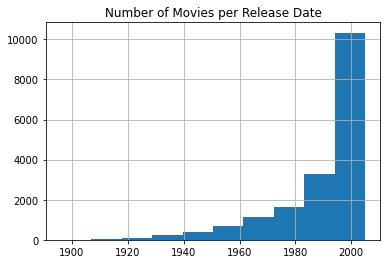

In [60]:
movies['Date'].hist()
plt.title("Number of Movies per Release Date")
plt.show()

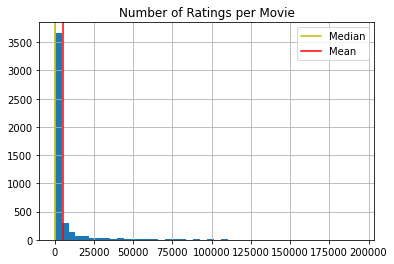

Mean nubmer of rating: 5346.46899310958
Median nubmer of rating: 552.0
Min number of rating: 36
Max number of rating: 193941


In [70]:
n = 4499

ratings = data.groupby('MovieID').count()['Rating']
ratings.hist(bins=n//100)
plt.axvline(ratings.median(), color='y', label="Median")
plt.axvline(ratings.mean(), color='r', label="Mean")
plt.title("Number of Ratings per Movie")
plt.legend()

plt.show()

print("Mean nubmer of rating:", ratings.mean())
print("Median nubmer of rating:", ratings.median())
print("Min number of rating:", ratings.min())
print("Max number of rating:", ratings.max())

In [81]:
data.head(10).groupby("MovieID").mean()

/tmp/ipykernel_3280/1781045649.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.head(10).groupby("MovieID").mean()


,Rating
MovieID,
1,3.6


/tmp/ipykernel_3280/1077547776.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ratings = data.groupby('MovieID').mean()['Rating']


ValueError: supplied range of [3.122836975342064e+33, inf] is not finite

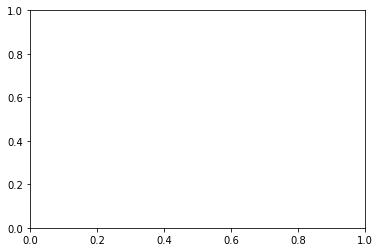

In [71]:
n = 4499

ratings = data.groupby('MovieID').mean()['Rating']
ratings.hist(bins=n//100)
plt.axvline(ratings.median(), color='y', label="Median")
plt.axvline(ratings.mean(), color='r', label="Mean")
plt.title("Average rating per Movie")
plt.legend()

plt.show()

print("Mean rating:", ratings.mean())
print("Median rating:", ratings.median())
print("Min rating:", ratings.min())
print("Max rating:", ratings.max())

#### Insightful

- Average ratings per release date

In [ ]:
# Number of ratings per release date



In [31]:
import sys
print(sys.getsizeof(data) / 1e6, 'MB')
print(sys.getsizeof(movies) / 1e6, 'MB')

203.19948 MB
1.66669 MB


2. Identify a predictive task that can be studied on this dataset. Describe how you will evaluate
your model at this predictive task, what relevant baselines can be used for comparison, and how
you will assess the validity of your model’s predictions. It’s also important in this section to
carefully describe what features you will use and how you had to process the data to obtain them.
Make sure to select a task and models that are relevant to the course content; if you want to try
out models you’ve seen in other classes that’s fine, but you should still implement models from
this class as baselines / comparison points.

3. Describe your model. Explain and justify your decision to use the model you proposed. How
will you optimize it? Did you run into any issues due to scalability, overfitting, etc.? What other
models did you consider for comparison? What were your unsuccessful attempts along the way?
What are the strengths and weaknesses of the different models being compared?

4. Describe literature related to the problem you are studying. If you are using an existing dataset,
where did it come from and how was it used? What other similar datasets have been studied in
the past and how? What are the state-of-the-art methods currently employed to study this type
of data? Are the conclusions from existing work similar to or different from your own findings?

5. Describe your results and conclusions. How well does your model perform compared to alternatives, and what is the significance of the results? Which feature representations worked well and
which do not? What is the interpretation of your model’s parameters? Why did the proposed
model succeed why others failed (or if it failed, why did it fail)?